In [19]:
# Import libraries and classes required for this example:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import pandas as pd 
import time
# Import dataset:
#input file
constituency_name="DublinNorth2002"
constituency=constituency_name+"_merged"
url='../data/processed/'+constituency+'_dist.csv'

# Assign column names to dataset:

# Convert dataset to a pandas dataframe:
dataset = pd.read_csv(url,  na_values=["Missing"], header=[0]) 

In [20]:
dataset.shape

(39289, 13)

In [21]:
print(dataset.columns)
display(dataset)

Index(['Unnamed: 0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       'Seq'],
      dtype='object')


,Unnamed: 0,1,2,3,4,5,6,7,8,9,10,11,Seq
0,0,0.000000,0.000000,3.465545,2.236068,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1
1,1,6.020797,11.629703,4.301163,4.301163,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1
2,2,1.004988,0.000000,6.363961,2.915476,1.581139,7.433034,10.689247,0.000000,3.465545,0.0,4.609772,1
3,3,6.363961,1.004988,1.004988,1.004988,3.465545,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1
4,4,2.915476,6.020797,11.629703,4.301163,4.301163,4.301163,0.000000,3.465545,0.000000,0.0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39284,39284,3.465545,3.465545,2.236068,6.363961,11.629703,4.301163,0.000000,0.000000,0.000000,0.0,0.000000,0
39285,39285,7.433034,7.433034,3.465545,1.004988,0.000000,1.004988,0.000000,0.000000,0.000000,0.0,0.000000,0
39286,39286,7.138627,3.465545,2.236068,6.020797,10.689247,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0
39287,39287,3.465545,3.465545,3.465545,4.301163,3.605551,3.605551,0.000000,0.000000,0.000000,0.0,0.000000,0


In [22]:
# Use head() function to return the first 5 rows: 
dataset.head() 
# Assign values to the X and y variables:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 12].values #Dublin north

In [23]:
print(y)

[1 1 1 ... 0 0 0]


In [24]:
# Split dataset into random train and test subsets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

#from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [25]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

start = time.time()
classifier.fit(X_train, y_train)

end = time.time()

training_time = format((end-start)*1000)
print("trainingtime elapsed {} milli seconds".format((end-start)*1000))

trainingtime elapsed 43.791770935058594 milli seconds


In [26]:

start = time.time()
y_pred  =  classifier.predict(X_test)

end = time.time()

test_time = format((end-start)*1000)
print("testing time elapsed {} milli seconds".format((end-start)*1000))
#y_pred

testing time elapsed 51.496028900146484 milli seconds


In [27]:
print(y_pred)

[0 0 0 ... 0 1 0]


In [28]:
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [29]:
print(ac)
print(cm)

0.6646729447696615
[[3941    0]
 [2635 1282]]


In [13]:
# Print results: 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

[[ 306    0]
 [  33 2025]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       306
           1       1.00      0.98      0.99      2058

    accuracy                           0.99      2364
   macro avg       0.95      0.99      0.97      2364
weighted avg       0.99      0.99      0.99      2364



[[3941    0]
 [2635 1282]]


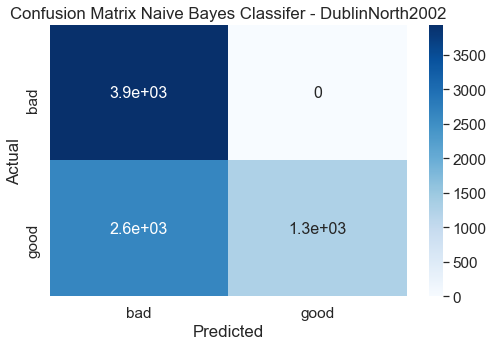

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix) #display confusion matrix
y_true = ["good", "bad"]
#y_pred = ["good", "bad"]
df_cm = pd.DataFrame(conf_matrix, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
df_cm.dtypes
plt.figure(figsize = (8,5))
plt.title('Confusion Matrix' + " Naive Bayes Classifer - " + constituency_name)
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size
plt.show()

In [15]:
#[row, column]
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Classification Accuracy
# use float to perform true division, not integer division
accuracy = ((TP + TN) / float(TP + TN + FP + FN))
#accuracy = accuracy_score(Y_test, y_pred_class)
print("Accuracy : %.4f" %accuracy)

# Classification Error/Misclassification Rate = 1 - accuracy
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print("Classification Error Rate : %.4f" %(classification_error))

# Precision
precision = TP / float(TP + FP)
print("Precision : %.4f" %(precision))
#print("Precision : %.4f" %(precision_score(Y_test, y_pred)))

# Sensitivity or Recall or True Positive Rate
sensitivity = TP / float(FN + TP)
print("Sensitivity/Recall :%.4f" %(sensitivity))
#print("Sensitivity/Recall : %.4f" %(recall_score(Y_test, y_pred)))

# Specificity oe true negative rate
specificity = TN / (TN + FP)
print("Specificity : %.4f" %(specificity))

# False Positive Rate (1 - specificity))
false_positive_rate = FP / float(TN + FP)
print("False Positive Rate : %.4f" %(false_positive_rate))

# False Negative Rate
false_negative_rate = FN / float(TP + FN)
print("False Negative Rate : %.4f" %(false_negative_rate))

# F1 Measure (F1 Score) = 2 * ((precision * sensitivity)/(precision + sensitivity))
F1_measure = 2* ((precision * sensitivity)/(precision + sensitivity))
print("F1-Measure : %.4f" %(F1_measure))

# Cross Validation is used to check the model is not overfitting
c_v_score = cross_val_score(classifier,X_train,y_train,cv = 10).mean()
print("cross val score: : %.4f" %(c_v_score))

# Training time
print("Training Time : %.4f" % float(training_time))

# Test time
print("Testing Time : %.4f" %float(test_time))

Accuracy : 0.9860
Classification Error Rate : 0.0140
Precision : 1.0000
Sensitivity/Recall :0.9840
Specificity : 1.0000
False Positive Rate : 0.0000
False Negative Rate : 0.0160
F1-Measure : 0.9919
cross val score: : 0.9829
Training Time : 10.8130
Testing Time : 2.1303
